<a href="https://colab.research.google.com/github/adityakshay/Machine-Learning/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Exploration

In [0]:
from sklearn.datasets import load_boston
import pandas as pd

In [0]:
data1 = load_boston()

In [0]:
data1.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
print(data1.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(data1.data)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
df.columns = data1.feature_names

In [0]:
df['price']= data1['target']

In [0]:
df.shape

(506, 14)

In [0]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [0]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [0]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

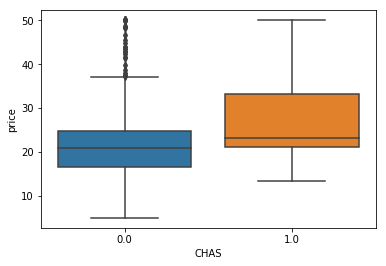

In [0]:
# Box plot
f, ax= plt.subplots()
fig = sns.boxplot(x='CHAS', y='price', data=df)

(-0.5, 45.5, 0, 22)

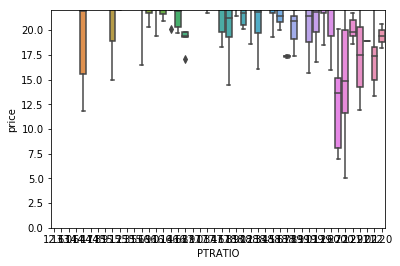

In [0]:
# Box plot
f, ax= plt.subplots()
fig = sns.boxplot(x='PTRATIO', y='price', data=df)
fig.axis(ymin=0, ymax=22)

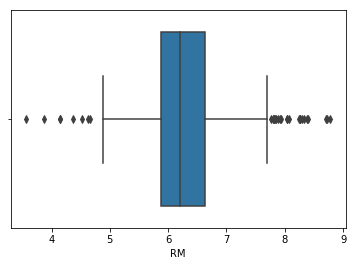

In [0]:
sns.boxplot(df['RM'])

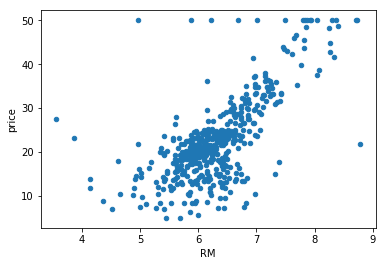

In [0]:
df.plot.scatter(x='RM', y='price')

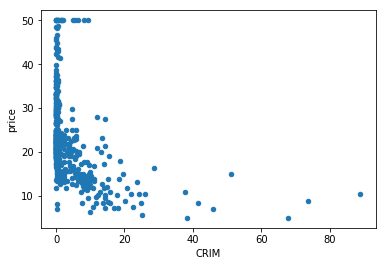

In [0]:
df.plot.scatter(x='CRIM', y='price')

In [0]:
import numpy as np
df['log_price']=np.log(df['price'])

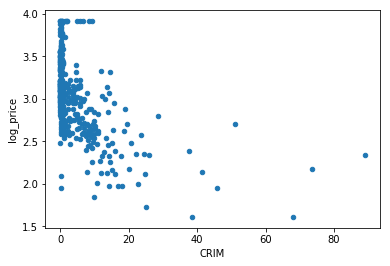

In [0]:
df.plot.scatter(x='CRIM', y='log_price')

In [0]:
df1=pd.get_dummies(df['CHAS'], prefix='CHAS_')

In [0]:
df1.head()

,CHAS__0.0,CHAS__1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [0]:
# Correlation Matrix
corrmat = df.drop(columns=['CHAS']).corr()

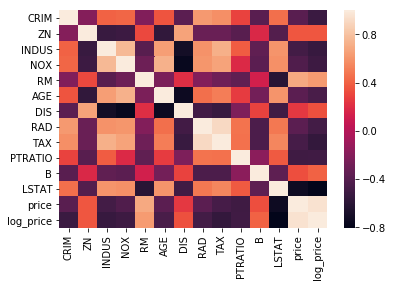

In [0]:
sns.heatmap(corrmat)

In [0]:
k=5
cols = corrmat.nlargest(k, 'price')['price'].index


In [0]:
cols

Index(['price', 'RM', 'ZN', 'B', 'DIS'], dtype='object')

In [0]:
df = df.drop(columns=['log_price'])

KeyError: ignored

In [0]:
cm = np.corrcoef(df[cols].values.T)

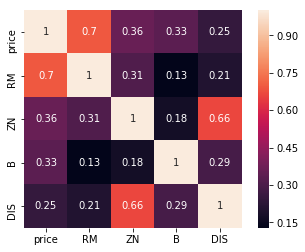

In [0]:
hm = sns.heatmap(cm, cbar= True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

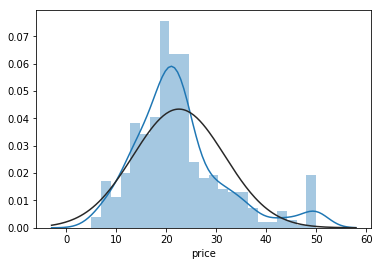

In [0]:
#Histograms

sns.distplot(df['price'], fit=norm)

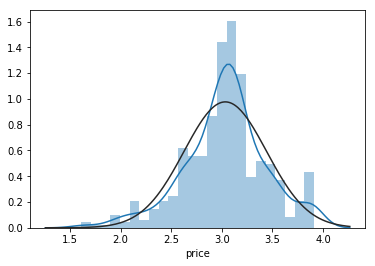

In [0]:
sns.distplot(np.log(df['price']), fit=norm)

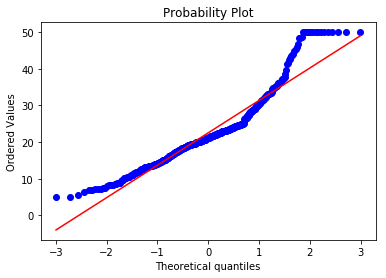

In [0]:
res= stats.probplot(df['price'], plot=plt)

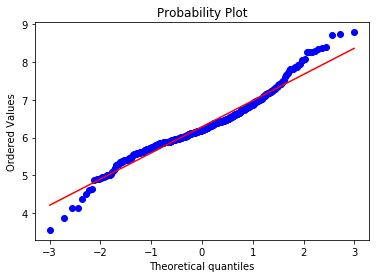

In [0]:
res= stats.probplot(df['RM'], plot=plt)

In [0]:
df['RM'].value_counts()

6.167    3
6.229    3
6.127    3
5.713    3
6.417    3
6.405    3
6.380    2
5.304    2
5.983    2
7.185    2
5.856    2
6.968    2
7.820    2
5.936    2
6.030    2
6.251    2
6.431    2
6.727    2
6.004    2
6.185    2
6.193    2
6.495    2
5.757    2
6.782    2
6.951    2
5.404    2
6.009    2
6.794    2
6.315    2
5.935    2
        ..
6.112    1
6.006    1
7.147    1
5.468    1
5.707    1
7.267    1
6.800    1
5.818    1
6.430    1
6.762    1
6.593    1
7.178    1
5.570    1
5.884    1
6.471    1
7.107    1
6.382    1
6.575    1
7.287    1
5.898    1
5.403    1
8.266    1
6.101    1
5.093    1
5.036    1
6.552    1
4.368    1
6.174    1
6.701    1
6.625    1
Name: RM, Length: 446, dtype: int64

In [0]:
df.loc[df['RM']>6,'RM_7_Flag']=1

In [0]:
df['RM_7_Flag'].value_counts()

1.0    333
Name: RM_7_Flag, dtype: int64

In [0]:
df[df['RM']<=6]['RM_7_Flag']

8     NaN
12    NaN
13    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
23    NaN
24    NaN
25    NaN
26    NaN
30    NaN
32    NaN
33    NaN
35    NaN
36    NaN
37    NaN
38    NaN
45    NaN
46    NaN
48    NaN
49    NaN
50    NaN
53    NaN
54    NaN
59    NaN
60    NaN
       ..
422   NaN
424   NaN
425   NaN
426   NaN
438   NaN
439   NaN
440   NaN
444   NaN
456   NaN
457   NaN
465   NaN
466   NaN
468   NaN
469   NaN
474   NaN
477   NaN
483   NaN
484   NaN
487   NaN
488   NaN
489   NaN
490   NaN
491   NaN
492   NaN
493   NaN
494   NaN
495   NaN
496   NaN
497   NaN
499   NaN
Name: RM_7_Flag, Length: 173, dtype: float64